<a href="https://colab.research.google.com/github/Nurulislamopu/DIP_Lab_Task_2019331530/blob/main/Copy_of_DIP_lab_exam_sec%5B19_20%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task of DIP Lab Final 2024(SEC 2019-20):
1.  Upload the image(`DIP_Lab_task_01.png`) from drive with extracting details like: image dimension, frequency distribution of intensities, range. [5]
2.  Convert the RGB image(`DIP_Lab_task_02.jpg`) to a gray scale image and compare a sub-region of the image by intensity values(5*5 dimension would be enough for comparison). [10]
3.  Apply Image(`DIP_Lab_task_03.png`) smoothing with appropriate kernel applied. Identify the noise(if any) before processing. [35]
4.  Implement an appropriate technique to reduce the brightness of the provided image (`DIP_Lab_task_04.jpg`) effectively. [20]
5.  Solve the segmentation problem for the given image: `'DIP_Lab_task_05.jpg'` [30]



## Lab Resources

https://drive.google.com/drive/folders/1DnF8_teHpzrHNvSspl-W5ooxNyxvUU2t?usp=sharing

Some Instructions to be strictly followed:
- You have to do the task individually but can discuss about the solution approach and possible technique to be applied to get the task done.
- **Do not share any of your code** with your fellow classmates that may have a huge penalty on both of your score.
- Create a git repo and submit the task there. Try to commit after completing each task individually. The git repo should be **private** until the submission.
- Make a video presentation of 4 minutes(max) explaining:
  1. Briefly explain the logical part of each task and what approaches you have taken to solve the problem
  2. Show the graphics output of the tasks
  3. Give a tour of your code
  4. Is there any other way to achieve similar/better results
  5. Mention the sources you got assistance from.[e.g. chatGPT]

### Deadline: 27/12/24 <11:59 pm>
*I won't accept any late submission. Your git repo should be public after 28/12/24 12:00 am*

Submission Link: https://docs.google.com/forms/d/e/1FAIpQLScK7S7uc_zNd4yhNyyAS0J97fq2S4k7fzZcf4pvX3z0E3A2rg/viewform?usp=header

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Image Dimensions: Height: 225, Width: 225, Channels: 3


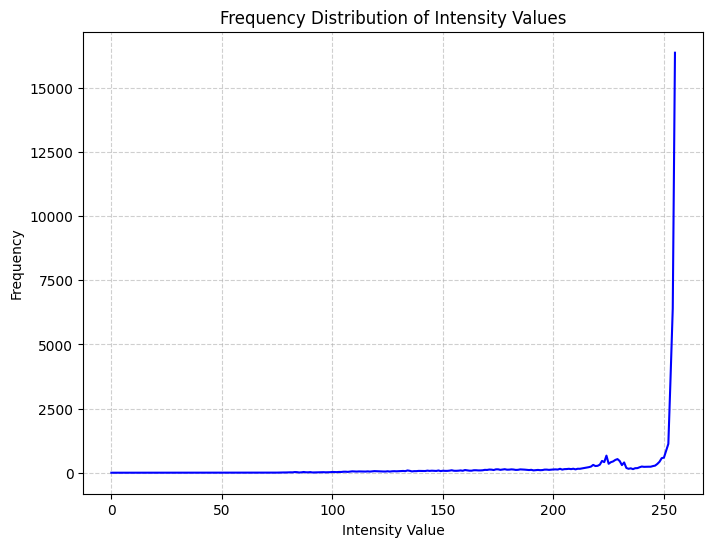

Minimum Intensity: 5
Maximum Intensity: 255
Intensity Range: 251


In [4]:
# Task 01

#answer to the question number 01

import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('/content/drive/MyDrive/DIP_Lab_task_01.png')
height, width, num_channels = image.shape
print("Image Dimensions:", f"Height: {height}, Width: {width}, Channels: {num_channels}")

intensity_distribution = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.figure(figsize=(8, 6))
plt.title("Frequency Distribution of Intensity Values")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.plot(intensity_distribution, color='blue')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
min_intensity = image.min()
max_intensity = image.max()
intensity_range = max_intensity - min_intensity + 1
print("Minimum Intensity:", min_intensity)
print("Maximum Intensity:", max_intensity)
print("Intensity Range:", intensity_range)

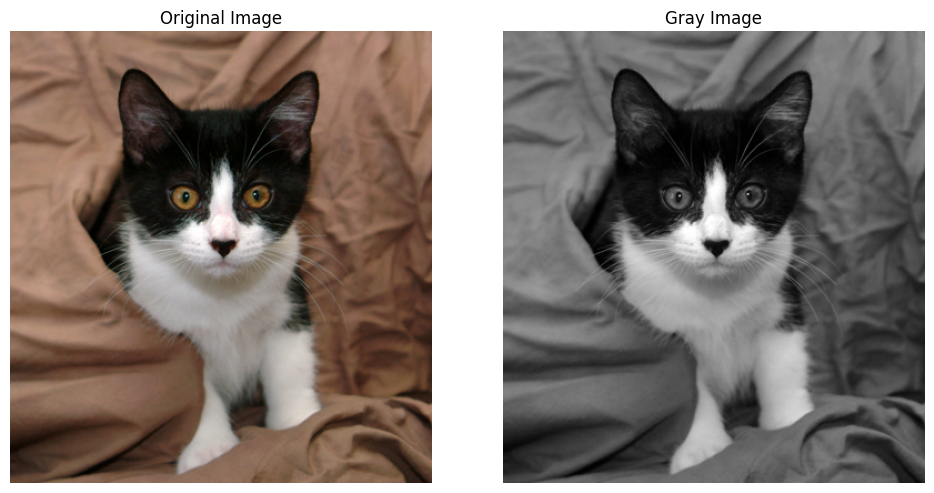

In [7]:
# Task 02

def rgb2gray(image):
  rows, cols, channels = image.shape

  output = np.zeros((rows, cols), dtype=np.uint8)
  for i in range(rows):
    for j in range(cols):
      r, g, b = image[i, j]
      output[i, j] = r*0.29 + g*0.58 + b*0.11

  return output

img2 = cv2.imread('/content/drive/MyDrive/DIP_Lab_task_02.jpg')
gray_img = rgb2gray(img2)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[0].axis('off')
axes[0].set_title('Original Image')

axes[1].imshow(gray_img, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Gray Image')

plt.tight_layout()
plt.show()

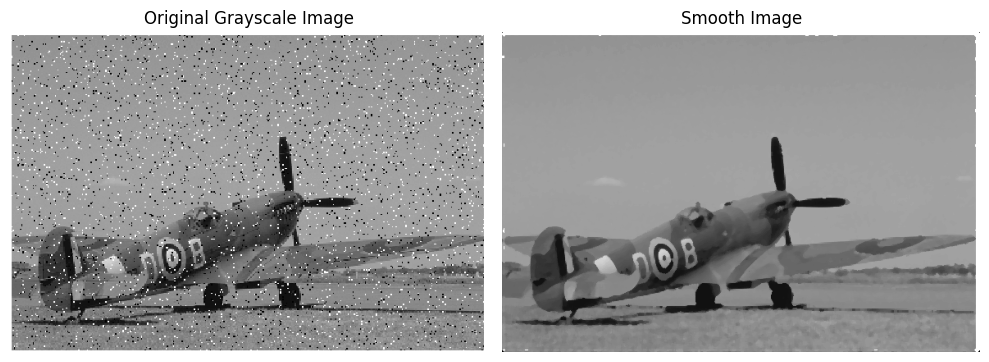

In [10]:
# Task 03

#This is Salt and Pepper Noise
# Using Median Filtering

def conv(image, kernel):
  kernelh, kernelw = kernel.shape
  padh = kernelh // 2
  padw = kernelw // 2

  padded_image = np.pad(image, ((padh, padh), (padw, padw)), 'constant')

  rows, cols = image.shape
  output = np.zeros((rows, cols))

  for i in range(rows):
    for j in range(cols):
        roi = padded_image[i:i + kernelh, j:j + kernelw]
        output[i, j] = np.median(roi)

  return output

img3 = cv2.imread('/content/drive/MyDrive/DIP_Lab_task_03.png')
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
smoothing_kernel = np.ones((5, 5), dtype=np.uint8) / 9

smooth_img = conv(img3_gray, smoothing_kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img3_gray, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original Grayscale Image')

axes[1].imshow(smooth_img, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Smooth Image')

plt.tight_layout()
plt.show()